In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable


class Net(nn.Module):
    # define nn
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 4)

    def forward(self, X):
        X = self.fc1(X)
        X = self.fc2(X)
        X = self.fc3(X)


        return X
    
# load IRIS dataset
dataset = pd.read_csv('iris.csv')

from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

# transform species to numerics
dataset['species'] = lb.fit_transform(dataset['species']).tolist()


dataset['species'] = dataset['species'].apply(lambda x: np.array(x, dtype=int))



train_X, test_X, train_y, test_y = train_test_split(dataset[dataset.columns[0:4]].values,
                                                    dataset.species.values, test_size=0.2)




# wrap up with Variable in pytorch
train_X = Variable(torch.FloatTensor(feature_train), requires_grad=False)
test_X = Variable(torch.FloatTensor(feature_test), requires_grad=False)
train_y = Variable(torch.FloatTensor(labels_train), requires_grad=False)
test_y = labels_test_v=Variable(torch.FloatTensor(labels_test), requires_grad=False)


print(train_X[0])
print(train_y[0])

net = Net()

criterion = nn.SmoothL1Loss()# cross entropy loss

optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

all_losses = []
for epoch in range(1000):
    out = net(train_y)
    loss = criterion(out, train_X)
    all_losses.append(loss.data)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print ('number of epoch', epoch, 'loss', loss.data)

predict_out = net(test_y)
_, predict_y = torch.max(predict_out, 1)

#print ('prediction accuracy', accuracy_score(test_X.data, predict_y.data))

#print ('macro precision', precision_score(test_X.data, predict_y.data, average='macro'))
#print ('micro precision', precision_score(test_X.data, predict_y.data, average='micro'))
#print ('macro recall', recall_score(test_X.data, predict_y.data, average='macro'))
#print ('micro recall', recall_score(test_X.data, predict_y.data, average='micro'))

tensor([7.7000, 2.8000, 6.7000, 2.0000])
tensor([0., 0., 1.])
number of epoch 0 loss tensor(3.0081)
number of epoch 100 loss tensor(0.3233)
number of epoch 200 loss tensor(0.1030)
number of epoch 300 loss tensor(0.0740)
number of epoch 400 loss tensor(0.0718)
number of epoch 500 loss tensor(0.0716)
number of epoch 600 loss tensor(0.0716)
number of epoch 700 loss tensor(0.0716)
number of epoch 800 loss tensor(0.0716)
number of epoch 900 loss tensor(0.0716)


In [127]:
print(train_y[20])
out = net(train_y)
print(out[20])
print(train_X[20])

tensor([0., 1., 0.])
tensor([5.9262, 2.7777, 4.2273, 1.3221], grad_fn=<SelectBackward>)
tensor([5.0000, 2.0000, 3.5000, 1.0000])


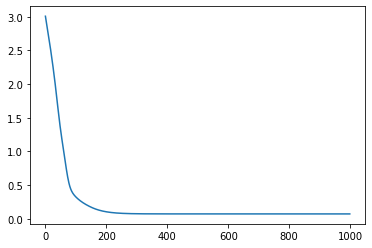

tensor([9.7175e-01, 2.8226e-02, 1.9639e-05], grad_fn=<SelectBackward>)
tensor([1., 0., 0.])
0.07157794386148453


In [128]:
all_losses=np.array(all_losses, dtype=np.float)
plt.plot(all_losses)
plt.show()
print(pred[3])
print(labels_train_v[3])
print(all_losses[-1])

In [55]:
test_X[0]
net(test_X)

tensor([[7.5340e-03, 2.8426e-01, 7.0820e-01],
        [9.8328e-01, 1.6720e-02, 4.1395e-06],
        [8.9154e-01, 1.0799e-01, 4.6947e-04],
        [9.7437e-01, 2.5621e-02, 1.2720e-05],
        [9.5973e-01, 4.0234e-02, 3.8730e-05],
        [1.4975e-03, 1.5932e-01, 8.3919e-01],
        [9.6681e-01, 3.3160e-02, 2.7386e-05],
        [9.4887e-01, 5.1060e-02, 7.0418e-05],
        [7.5190e-02, 6.3467e-01, 2.9014e-01],
        [9.5931e-01, 4.0653e-02, 4.1814e-05],
        [9.6652e-05, 3.1135e-02, 9.6877e-01],
        [6.0866e-02, 6.0878e-01, 3.3036e-01],
        [9.7483e-01, 2.5155e-02, 1.1647e-05],
        [7.9187e-02, 6.9164e-01, 2.2917e-01],
        [2.8349e-02, 5.5425e-01, 4.1740e-01],
        [5.6011e-02, 6.0905e-01, 3.3494e-01],
        [5.0363e-04, 8.8455e-02, 9.1104e-01],
        [1.2146e-02, 3.9513e-01, 5.9272e-01],
        [1.2905e-03, 1.0902e-01, 8.8969e-01],
        [2.1038e-02, 4.1846e-01, 5.6050e-01],
        [9.4922e-01, 5.0713e-02, 7.1237e-05],
        [9.7833e-01, 2.1663e-02, 6